# Convolutional Neural Network
    1.Apply CNN to predict cat and dog from given image dataset


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# Importing the Keras libraries and packages(Using TensorFlow backend.)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import pickle
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import importlib.util

Using TensorFlow backend.


In [46]:
#Initializing Neural Network, we use the Sequential module for initialization.
classifier = Sequential(name=None)

### Convolution layer
The Conv2D function is taking 4 arguments, the first is the number of filters i.e 32 here, the second argument is the shape each filter is going to be i.e 3x3 here, the third is the input shape and the type of image(RGB or Black and White)of each image i.e the input image our CNN is going to be taking is of a 64x64 resolution and “3” stands for RGB, which is a colour img, the fourth argument is the activation function we want to use, here ‘relu’ stands for a rectifier function.

In [3]:
#Convolution step
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


### Pooling Layer
We take a 2x2 matrix we’ll have minimum pixel loss and get a precise region where the feature are located

In [4]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Flatting
    pooled images into a continuous vector through Flattening.
    we are basically doing here is taking the 2-D array, i.e pooled image pixels and converting them to a one dimensional single vector.

In [5]:
classifier.add(Flatten())

### fully connected layer
    In this layer we are going to connect the set of nodes we got after the flattening step, these nodes will 
    act as an input layer to these fully-connected layers. 
    
    As this layer will be present between the input layer and output layer, we can refer to it a hidden layer for that we use Dence module

In [6]:
classifier.add(Dense(units = 128, activation = 'relu'))

Dense is the function to add a fully connected layer, ‘units’ is where we define the number of nodes 
that should be present in this hidden layer, these units value will be always between the number
of input nodes and the output nodes but the art of choosing the most optimal number of nodes can be achieved 
only through experimental tries. Though it’s a common practice to use a power of 2.
And the activation function will be a rectifier function and at last sigmoid function.

In [7]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Complie the CNN Model
    Optimizer parameter is to choose the stochastic gradient descent algorithm.
    Loss parameter is to choose the loss function.
    Finally, the metrics parameter is to choose the performance metric.


In [8]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Image preprocesasing (Data Augmentation)
    we are going to pre-process the images to prevent over-fitting.
    Overfitting is when you get a great training accuracy and very poor test accuracy due to overfitting 
    of nodes from one layer to another.
we are creating synthetic data out of the same images by performing different type of operations
on these images like flipping, rotating, blurring, etc.

    shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]
    rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
    horizontal_flip: Boolean. Randomly flip inputs horizontally.

In [9]:
#fitting the CNN model
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    '/home/admin1/PycharmProjects/Machine-Learning/Week_15/Prob1_Cat_Dog/dataset/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')

test_set = test_datagen.flow_from_directory(
    '/home/admin1/PycharmProjects/Machine-Learning/Week_15/Prob1_Cat_Dog/dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
#Divide train deta into train and cross validation
from sklearn.model_selection import train_test_split
import pandas as pd

In [13]:

# dataset = pd.read_csv(dataset/training_set)

### fit the Cnn model

In [ ]:
# TRAINING
model.fit_generator(
        train_generator,
        steps_per_epoch=400 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

model.save_weights('50_epochs.h5')  # always save your weights after training or during training

In [17]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 80,  // batch_size 
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 20 // batch_size)

Epoch 1/10
80/80 [==============================] - 39s 482ms/step - loss: 0.6380 - acc: 0.6340 - val_loss: 0.6732 - val_acc: 0.6203
Epoch 2/10
80/80 [==============================] - 32s 397ms/step - loss: 0.6273 - acc: 0.6590 - val_loss: 0.6188 - val_acc: 0.6378
Epoch 3/10
80/80 [==============================] - 17s 214ms/step - loss: 0.6012 - acc: 0.6801 - val_loss: 0.5792 - val_acc: 0.7094
Epoch 4/10
80/80 [==============================] - 16s 204ms/step - loss: 0.5812 - acc: 0.6961 - val_loss: 0.5703 - val_acc: 0.7328
Epoch 5/10
80/80 [==============================] - 15s 189ms/step - loss: 0.5746 - acc: 0.6980 - val_loss: 0.5562 - val_acc: 0.7109
Epoch 6/10
80/80 [==============================] - 16s 194ms/step - loss: 0.5754 - acc: 0.7039 - val_loss: 0.5466 - val_acc: 0.7308
Epoch 7/10
80/80 [==============================] - 14s 178ms/step - loss: 0.5628 - acc: 0.7086 - val_loss: 0.5922 - val_acc: 0.6844
Epoch 8/10
80/80 [==============================] - 14s 179ms/step - 

In [52]:
# Save keras model
classifier.save_weights('10_epochs.h5')  # always save your weights after training or during training

In [36]:
import PIL.Image
# from PIL import *
from tensorflow.keras.preprocessing import image

### Prediction of image

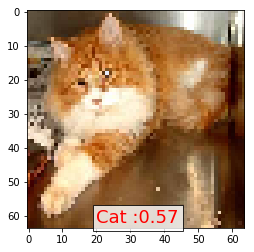

In [37]:
# img12 = image.load_img('dataset/test_set/dogs/dog.4001.jpg', target_size = (64, 64))
img1 = image.load_img('dataset/test_set/cats/cat.4052.jpg', target_size = (64, 64))

"""img_to_array-> it would ensure that the returned array is a 3D array (for example, if the given input 
img is a 2D array which might represent a grayscale image, then it would add another axis with dimension 1 
to make it a 3D array)."""

img = image.img_to_array(img1)
# scalling
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
   value ='Dog :%1.2f'%(prediction[0,0])
   plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
   value ='Cat :%1.2f'%(1.0-prediction[0,0])
   plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

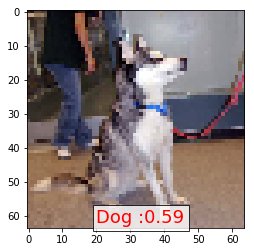

In [38]:

img1 = image.load_img('dataset/test_set/dogs/dog.4001.jpg', target_size = (64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
   value ='Dog :%1.2f'%(prediction[0,0])
   plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
   value ='Cat :%1.2f'%(1.0-prediction[0,0])
   plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [39]:
prediction

array([[0.58819145]], dtype=float32)

In [ ]:
#load the pickle file
file = open ('CNN.pickle','wb')
pickle.load(classifier,file)

